# Plot global temperature anomalies from Berkeley Earth

<i>© Von P. Walden, Washington State University</i>

The data used in this notebook are from [Berkeley Earth](http://berkeleyearth.org/data): Land_and_Ocean_LatLong1.nc

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr

### Working from your local computer

If you are running this notebook from your local computer, you will need to:

1) Download a large (400 MB) data file from Berkeley Earth by clicking on [this link](http://berkeleyearth.lbl.gov/auto/Global/Gridded/Land_and_Ocean_LatLong1.nc)

2) Edit the code cell below by replacing '../Land_and_Ocean_LatLong1.nc' with the pathname to the data file on your local hard drive.

In [2]:
be = xr.open_dataset('../../Land_and_Ocean_LatLong1.nc')
#be = xr.open_dataset('/Users/vonw/work/courses/2021-2022/spring/CE401/jupyterbook/CE401/Land_and_Ocean_LatLong1.nc')
be

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2064, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:  Berkeley Earth Internal Convention (based on CF-1.5)
    title:        Native Format Berkeley Earth Surface Temperature Anomaly Field
    institution:  Berkeley Earth Surface Temperature Project
    comment:      This file contains surface temperature anomaly field gridde...

### Plot geographic distribution of 1951-1980 climatology

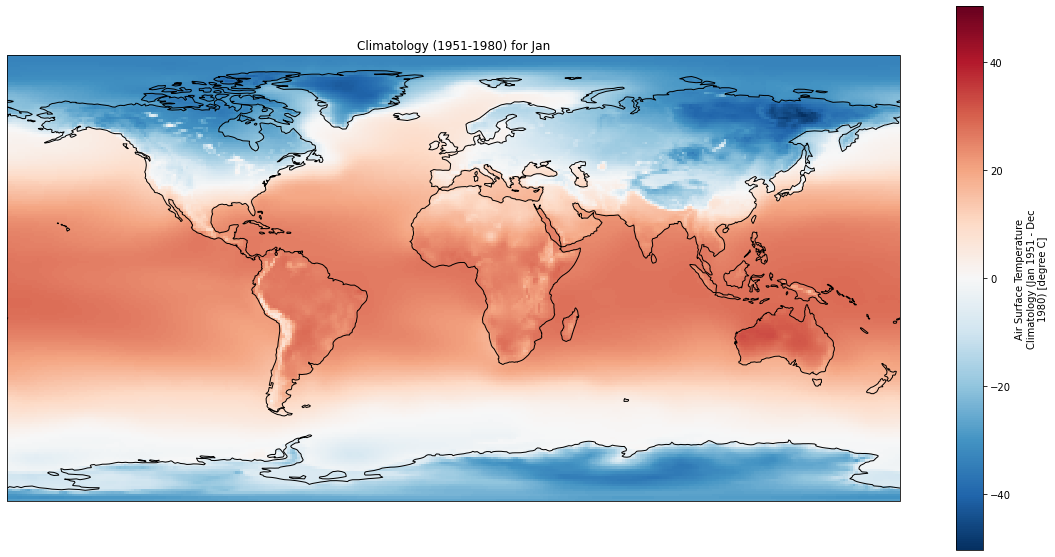

In [3]:
# Select a particular month to view
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
be.climatology[months.index(month)].plot(ax=ax)
plt.title('Climatology (1951-1980) for ' + month);

### Plot geographic distribution of temperature anomalies for given year and month

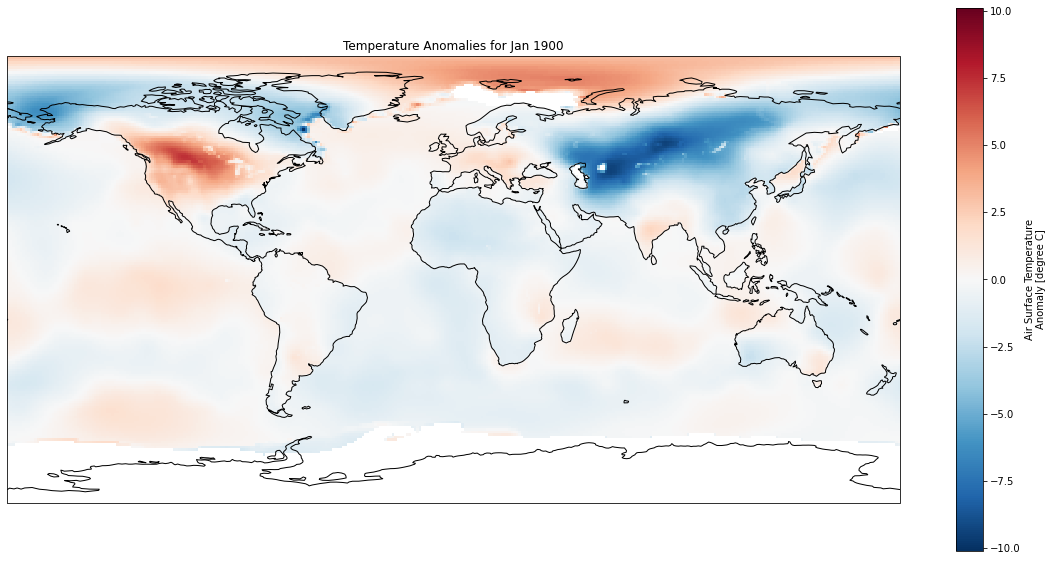

In [5]:
# Select a particular year and month to view
year = 1900
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
(be.temperature[months.index(month)+((year-1850)*12)]).plot(ax=ax, clim=[-10, 10])
plt.title('Temperature Anomalies for ' + month + ' ' + str(year));

### Plot geographic distribution of actual temperatures for given year and month

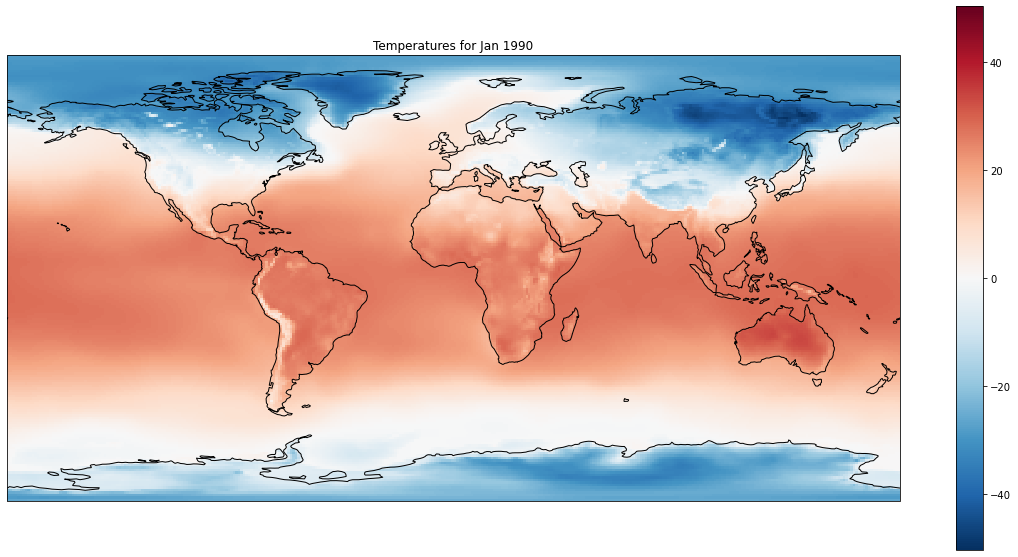

In [6]:
# Select a particular year and month to view
year = 1990
month = 'Jan'
#month = 'Jul'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
(be.temperature[months.index(month)+((year-1850)*12)] + be.climatology[months.index(month)]).plot(ax=ax, clim=[-10, 10])
plt.title('Temperatures for ' + month + ' ' + str(year));

### Calculate global annual temperature anomalies

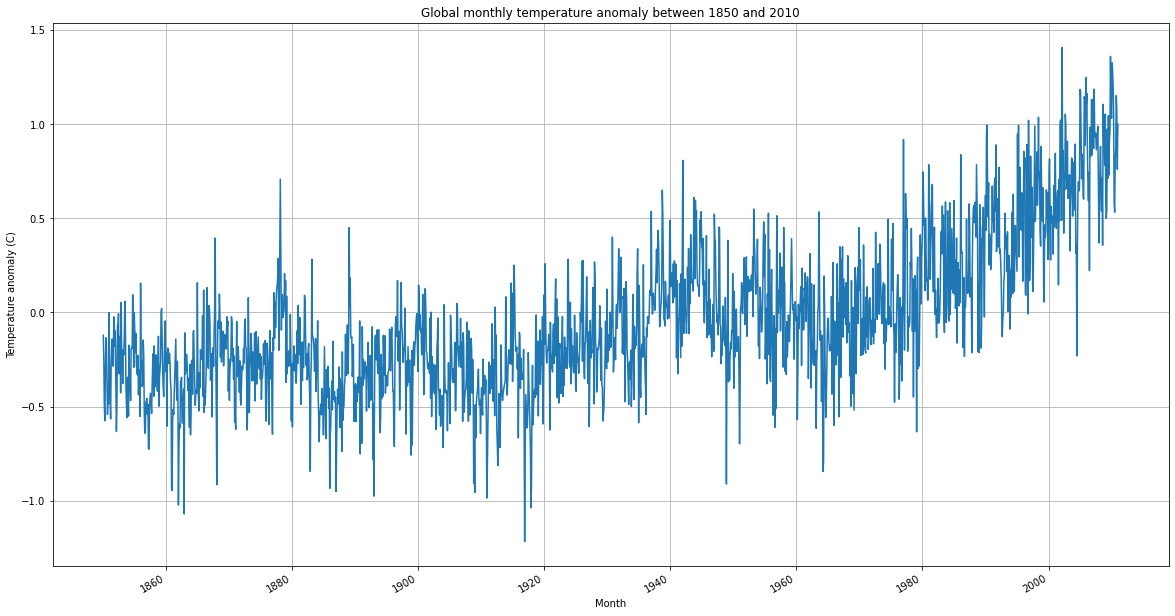

In [8]:
# Select a particular year and month to view
# !! Depending on how many years you choose to analyze, this COULD TAKE TENS OF SECONDS to complete.
beginning_year = 1850
ending_year = 2010

months = pd.date_range(start=str(beginning_year), end=str(ending_year+1), freq='M')

data = []
for month in months:
    #print(month.month)
    data.append(be.temperature[month.month+((month.year-1850)*12)].mean())

Tanomalies = xr.DataArray(data, coords={'month': months})

fig = plt.figure(figsize=(20,10))
Tanomalies.plot()
plt.grid()
plt.xlabel('Month');
plt.ylabel('Temperature anomaly (C)');
plt.title('Global monthly temperature anomaly between ' + str(beginning_year) + ' and ' + str(ending_year));

### Calculate longitudinally-averaged temperature anomalies

In [ ]:
# Select the latitude range to average over
beginning_latitude = -5
ending_latitude = 5

# Select a particular year and month to view
# !! Depending on how many years you choose to analyze, this COULD TAKE TENS OF SECONDS to complete.
beginning_year = 1950
ending_year = 2020

months = pd.date_range(start=str(beginning_year), end=str(ending_year+1), freq='M')

data = []
for month in months:
    #print(month.month)
    data.append(be.temperature[month.month+((month.year-1850)*12)].sel(latitude=slice(beginning_latitude, ending_latitude)).mean())

Tanomalies = xr.DataArray(data, coords={'month': months})

fig = plt.figure(figsize=(20,10))
Tanomalies.plot()
plt.grid()
plt.xlabel('Month');
plt.ylabel('Temperature anomaly (C)');
plt.title('Equatorial temperature anomaly between ' + str(beginning_year) + ' and ' + str(ending_year));